In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
colors = sns.color_palette()
colors

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [3]:
from pathlib import Path
p = Path("./datasets")
p

PosixPath('datasets')

In [4]:
ls = !ls datasets

In [5]:
ls


['dim_campaigns.csv', 'dim_products.csv', 'dim_stores.csv', 'fact_events.csv']

In [6]:
campaigns, products, stores, events = [pd.read_csv(p/file) for file in ls]

In [7]:
campaigns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   campaign_id    2 non-null      object
 1   campaign_name  2 non-null      object
 2   start_date     2 non-null      object
 3   end_date       2 non-null      object
dtypes: object(4)
memory usage: 196.0+ bytes


In [8]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   store_id  50 non-null     object
 1   city      50 non-null     object
dtypes: object(2)
memory usage: 932.0+ bytes


In [9]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_code  15 non-null     object
 1   product_name  15 non-null     object
 2   category      15 non-null     object
dtypes: object(3)
memory usage: 492.0+ bytes


In [10]:
stores_per_city = stores.groupby('city')['store_id'].nunique().sort_values(ascending=False)
df_city = stores_per_city.reset_index()
df_city.columns = ["City", "Store_Count"]
print(df_city)


            City  Store_Count
0      Bengaluru           10
1        Chennai            8
2      Hyderabad            7
3     Coimbatore            5
4  Visakhapatnam            5
5        Madurai            4
6         Mysuru            4
7      Mangalore            3
8     Trivandrum            2
9     Vijayawada            2


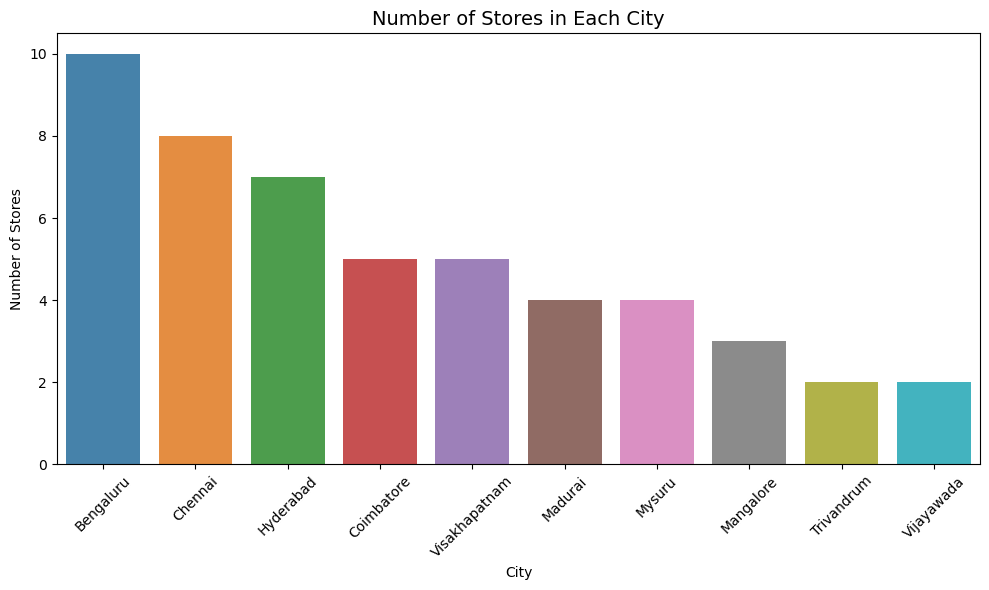

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(
    x="City", 
    y="Store_Count", 
    hue="City",  
    data=df_city, 
    palette=colors,
    alpha=0.9
)

plt.title("Number of Stores in Each City", fontsize=14)
plt.xticks(rotation=45)
plt.xlabel("City")
plt.ylabel("Number of Stores")
plt.tight_layout()
plt.savefig('image1.png')
plt.show()

## Inference
- There are a total of 50 stores spread across 10 cities
- Bengaluru has highest number of of stores, followed by chennai and hyderbad.
- The cities have a minimum of 2 stores and a maximum of 10 stores.
- The average number of stores a city has is 5.

In [12]:
events.columns.to_list()

['event_id',
 'store_id',
 'campaign_id',
 'product_code',
 'base_price(before_promo)',
 'quantity_sold(before_promo)',
 'promo_type',
 'base_price(after_promo)',
 'quantity_sold(after_promo)']

In [13]:
df = events.merge(right=campaigns, how='left' ,on='campaign_id')\
.merge(right=products, how='left', on='product_code')\
.merge(right=stores, how='left', on='store_id')


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   event_id                     1500 non-null   object 
 1   store_id                     1500 non-null   object 
 2   campaign_id                  1500 non-null   object 
 3   product_code                 1500 non-null   object 
 4   base_price(before_promo)     1500 non-null   int64  
 5   quantity_sold(before_promo)  1500 non-null   float64
 6   promo_type                   1500 non-null   object 
 7   base_price(after_promo)      1500 non-null   int64  
 8   quantity_sold(after_promo)   1500 non-null   int64  
 9   campaign_name                1500 non-null   object 
 10  start_date                   1500 non-null   object 
 11  end_date                     1500 non-null   object 
 12  product_name                 1500 non-null   object 
 13  category          

In [15]:
def get_category_percent(df, campaign):
    camp = df.loc[df['campaign_name'] == campaign]
    category_sales = camp.groupby('category')["quantity_sold(after_promo)"].sum()
    category_percent = category_sales*100/category_sales.sum()
    return category_percent

campaigns.campaign_name.tolist()


['Diwali', 'Sankranti']

In [17]:
import matplotlib.patches as patches

def plot_pie():
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    for i, camp_name in enumerate(campaigns.campaign_name.tolist()[:2]):
        df_camp = get_category_percent(df, camp_name)

        wedges, texts, autotexts = axes[i].pie(
            df_camp,
            autopct="%.1f%%",
            wedgeprops={'alpha': 0.75},
            labels=df_camp.index,
            explode=[0.01] * len(df_camp)
        )
        axes[i].set_title(f"Category contribution to Sales\n{camp_name} Campaign", fontsize=12)

        # 🔹 Add border (circle) around pie
        circle = patches.Circle((0,0), 1, transform=axes[i].transData._b, 
                                fill=False, edgecolor="black", linewidth=2)
        axes[i].add_artist(circle)

    plt.tight_layout()
    #plt.savefig('image2.png')

    plt.show()


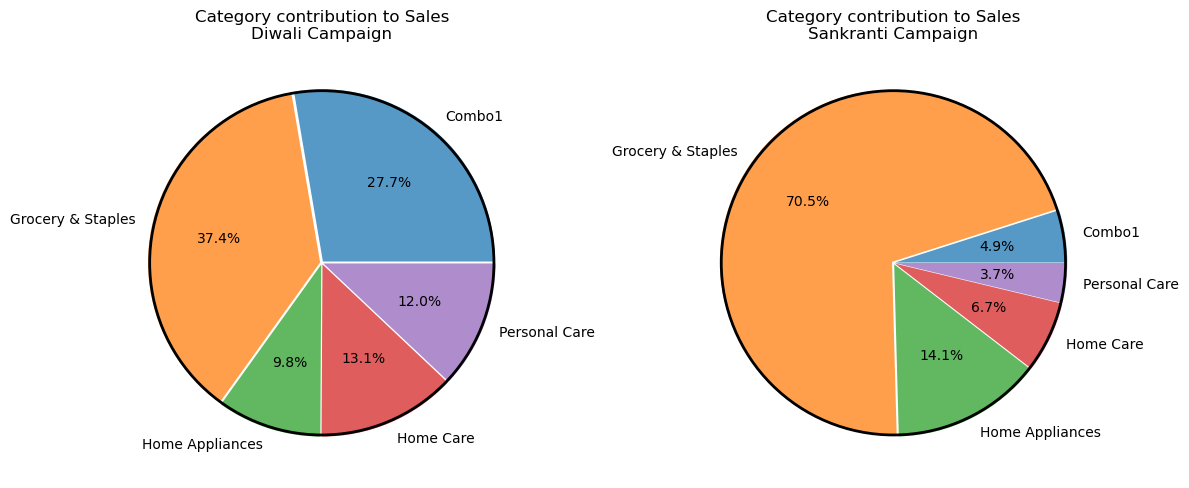

In [18]:
plot_pie()

## Inference
- Grocery & Staples contributed to 70.5% of total sales
- Personal Care shows only 3.7% , the reason can be lower demand
- Demand for grocery & Staples are higher during sankranti and thus sales can be increased by focused promotions

In [19]:
df[['base_price(after_promo)', 'quantity_sold(after_promo)']]

,base_price(after_promo),quantity_sold(after_promo)
0,217,287
1,185,1622
2,576,488
3,41,107
4,2500,272
...,...,...
1495,115,504
1496,115,284
1497,115,302
1498,41,109


In [20]:
df.columns

Index(['event_id', 'store_id', 'campaign_id', 'product_code',
       'base_price(before_promo)', 'quantity_sold(before_promo)', 'promo_type',
       'base_price(after_promo)', 'quantity_sold(after_promo)',
       'campaign_name', 'start_date', 'end_date', 'product_name', 'category',
       'city'],
      dtype='object')

In [21]:
df['base_price_change'] = df['base_price(after_promo)'] - df['base_price(before_promo)']
df['quantity_sold_change'] = df['quantity_sold(after_promo)'] - df['quantity_sold(before_promo)']
df['revenue_before'] = df['base_price(before_promo)']*df['quantity_sold(before_promo)']
df['revenue_after'] = df['base_price(after_promo)']*df['base_price(before_promo)']
df['revenue_change'] = df['revenue_after'] - df['revenue_before']

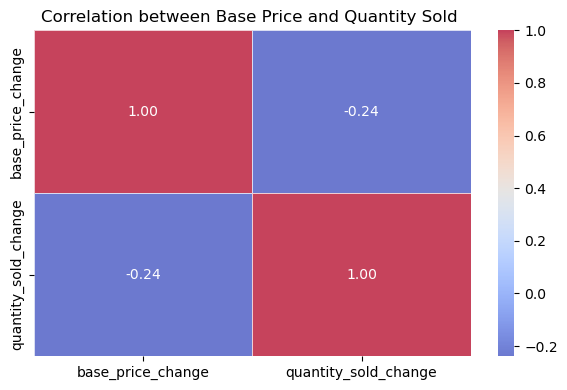

In [39]:
corr_df1 = df[['base_price_change', 'quantity_sold_change']]
corr_df2 = df.loc[df['category'] == 'Grocery & Staples',['base_price_change', 'quantity_sold_change']]
# Compute correlation
corr = corr_df1.corr()

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, alpha=0.75)
plt.title("Correlation between Base Price and Quantity Sold ")
plt.tight_layout()
plt.savefig('image3.jpg')
plt.show()

In [24]:
df.groupby(['category', 'product_name'])['quantity_sold(before_promo)'].sum()

category           product_name                             
Combo1             Atliq_Home_Essential_8_Product_Combo         21730.0
Grocery & Staples  Atliq_Farm_Chakki_Atta (1KG)                 32340.0
                   Atliq_Masoor_Dal (1KG)                       25706.0
                   Atliq_Sonamasuri_Rice (10KG)                 36870.0
                   Atliq_Suflower_Oil (1L)                      31000.0
Home Appliances    Atliq_High_Glo_15W_LED_Bulb                   8188.0
                   Atliq_waterproof_Immersion_Rod                6468.0
Home Care          Atliq_Curtains                                4625.0
                   Atliq_Double_Bedsheet_set                     4232.0
                   Atliq_Fusion_Container_Set_of_3               5215.0
                   Atliq_Scrub_Sponge_For_Dishwash               5762.0
Personal Care      Atliq_Body_Milk_Nourishing_Lotion (120ML)     6008.0
                   Atliq_Cream_Beauty_Bathing_Soap (125GM)       6437.0
   

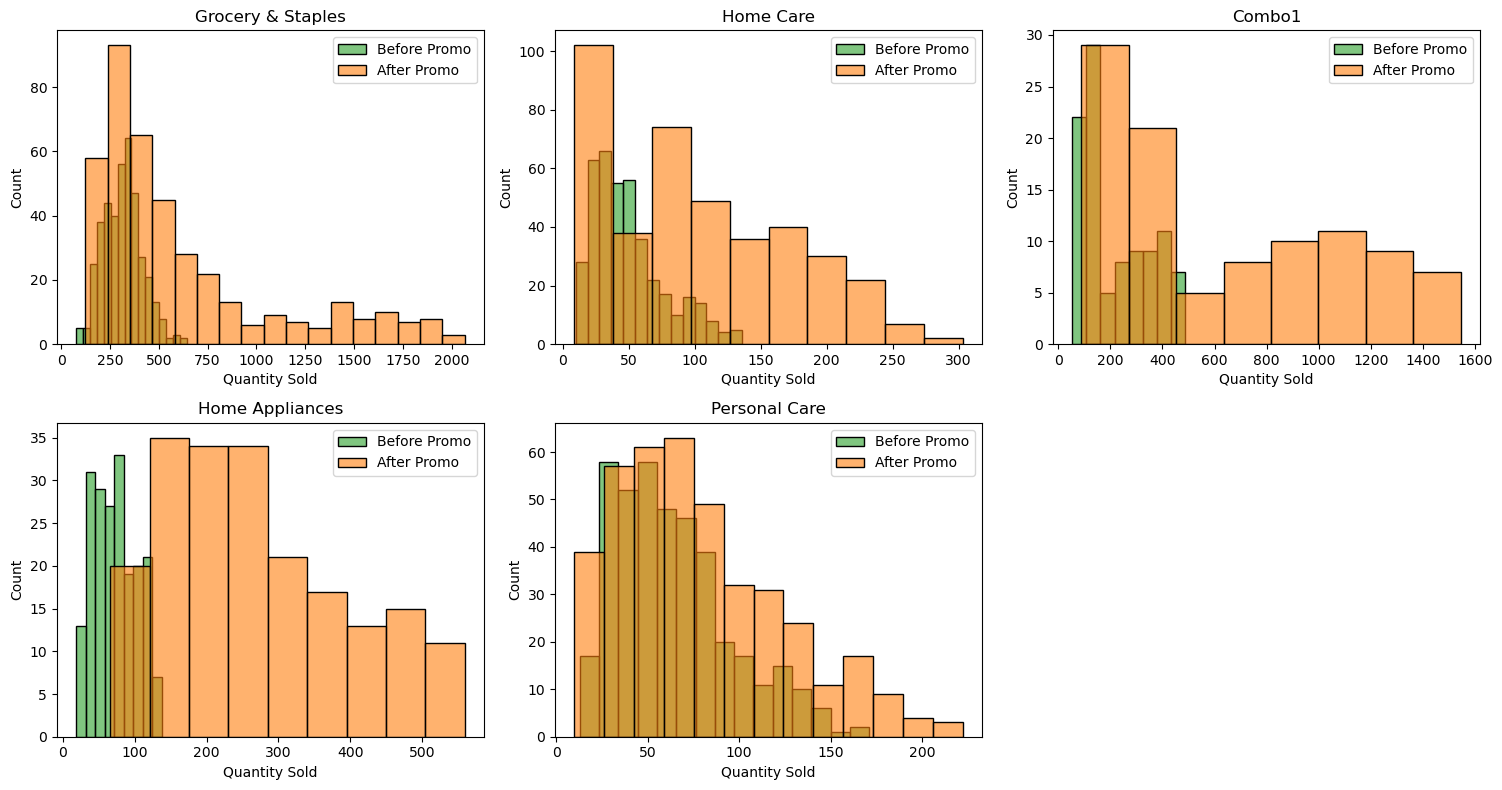

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_category_histograms(df, categories):
    plt.figure(figsize=(15, 8))

    for i, category in enumerate(categories[:6], 1):   # 6 categories, 2 rows x 3 cols
        plt.subplot(2, 3, i)
        cat = df[df['category'] == category]

        # Before promo
        sns.histplot(cat['quantity_sold(before_promo)'], 
                      color=colors[2], alpha=0.6, label="Before Promo")

        # After promo
        sns.histplot(cat['quantity_sold(after_promo)'], 
                     color=colors[1], alpha=0.6, label="After Promo")

        plt.title(category, fontsize=12)
        plt.xlabel("Quantity Sold")
        # plt.ylabel("Frequency")
        plt.legend()

    plt.tight_layout()
    plt.savefig('image4.png')

    plt.show()


plot_category_histograms(df, df.category.unique().tolist())


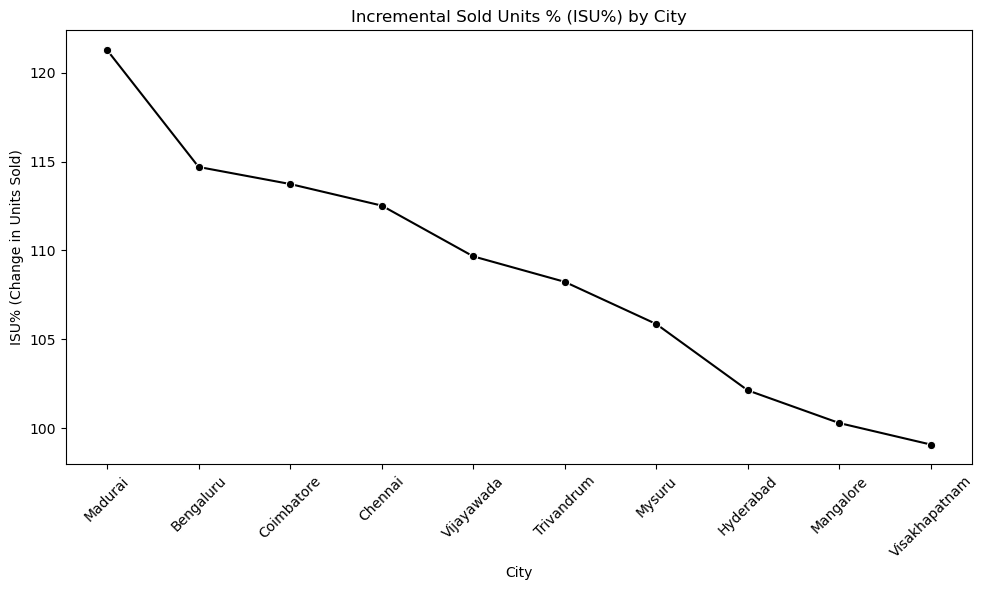

City with Highest ISU%: Madurai (121.28%)
City with Smallest ISU%: Visakhapatnam (99.07%)


In [30]:
city_sales = df.groupby('city').agg({
    'quantity_sold(before_promo)': 'sum',
    'quantity_sold(after_promo)': 'sum'
}).reset_index()

# Calculate ISU%
city_sales['ISU%'] = ((city_sales['quantity_sold(after_promo)'] - 
                       city_sales['quantity_sold(before_promo)']) / 
                       city_sales['quantity_sold(before_promo)']) * 100

# Sort by ISU% for better visualization
city_sales = city_sales.sort_values('ISU%', ascending=False)

# Line plot
plt.figure(figsize=(10,6))
sns.lineplot(data=city_sales, x='city', y='ISU%', marker='o',color='black')
#sns.barplot(data=city_sales, x='city', y='ISU%')

# Highlight highest & lowest
max_city = city_sales.loc[city_sales['ISU%'].idxmax()]
min_city = city_sales.loc[city_sales['ISU%'].idxmin()]

# plt.text(max_city['city'], max_city['ISU%']+1, f"Highest: {max_city['ISU%']:.1f}%", 
#          ha='center', fontsize=10, color='green')
# plt.text(min_city['city'], min_city['ISU%']-3, f"Lowest: {min_city['ISU%']:.1f}%", 
#          ha='center', fontsize=10, color='red')

plt.title("Incremental Sold Units % (ISU%) by City")
plt.ylabel("ISU% (Change in Units Sold)")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('image5.png')

plt.show()

print("City with Highest ISU%:", max_city['city'], f"({max_city['ISU%']:.2f}%)")
print("City with Smallest ISU%:", min_city['city'], f"({min_city['ISU%']:.2f}%)")

In [31]:
city_sales[['city', 'ISU%']]

,city,ISU%
4,Madurai,121.276445
0,Bengaluru,114.696153
2,Coimbatore,113.736264
1,Chennai,112.523288
8,Vijayawada,109.665849
7,Trivandrum,108.230958
6,Mysuru,105.856499
3,Hyderabad,102.123198
5,Mangalore,100.281728
9,Visakhapatnam,99.072607


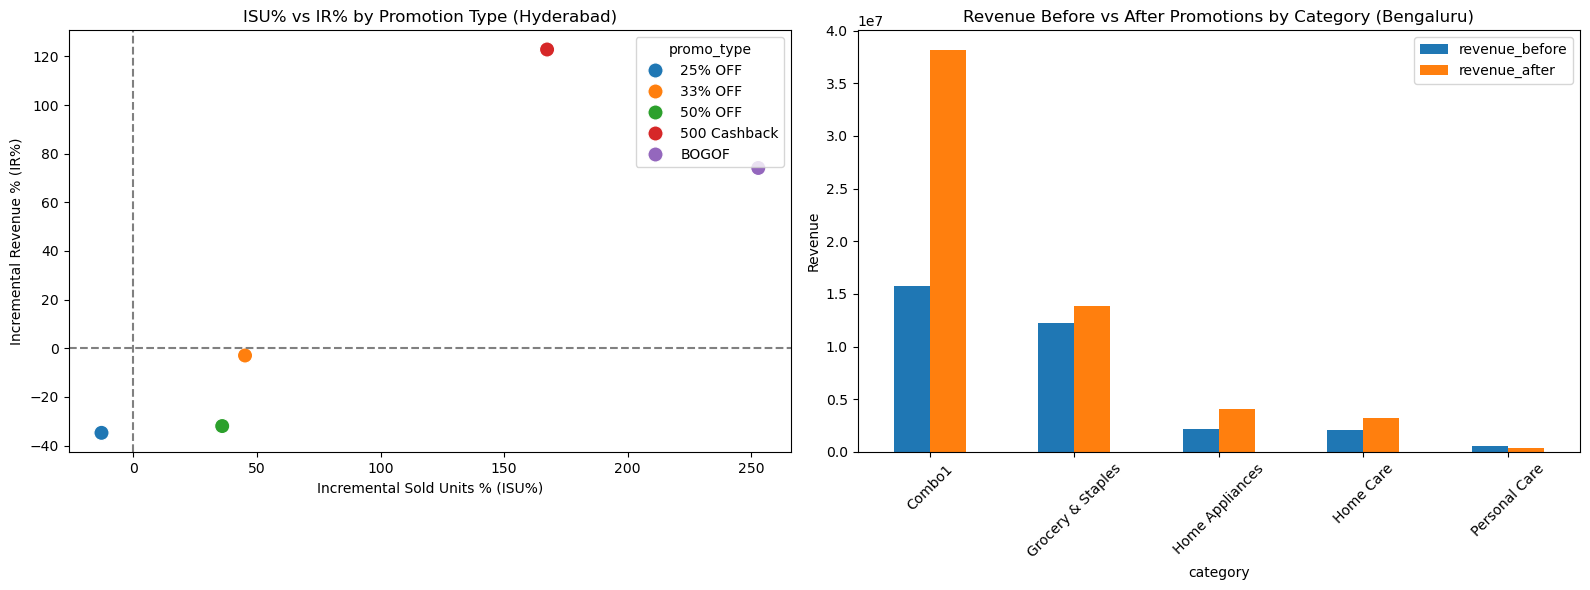

In [34]:
# ---------------- HYDERABAD PLOT ----------------
hyd = df[df['city'] == "Hyderabad"].copy()

hyd['revenue_before'] = hyd['base_price(before_promo)'] * hyd['quantity_sold(before_promo)']
hyd['revenue_after'] = hyd['base_price(after_promo)'] * hyd['quantity_sold(after_promo)']

promo_perf = hyd.groupby('promo_type').agg({
    'quantity_sold(before_promo)': 'sum',
    'quantity_sold(after_promo)': 'sum',
    'revenue_before': 'sum',
    'revenue_after': 'sum'
}).reset_index()

promo_perf['ISU%'] = ((promo_perf['quantity_sold(after_promo)'] - promo_perf['quantity_sold(before_promo)']) / 
                      promo_perf['quantity_sold(before_promo)']) * 100

promo_perf['IR%'] = ((promo_perf['revenue_after'] - promo_perf['revenue_before']) / 
                     promo_perf['revenue_before']) * 100


# ---------------- BENGALURU PLOT ----------------
blr = df[df["city"] == "Bengaluru"].copy()

blr["revenue_before"] = blr["base_price(before_promo)"] * blr["quantity_sold(before_promo)"]
blr["revenue_after"] = blr["base_price(after_promo)"] * blr["quantity_sold(after_promo)"]

category_perf = blr.groupby("category").agg({
    "revenue_before": "sum",
    "revenue_after": "sum"
})


# ---------------- COMBINED SUBPLOTS ----------------
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Hyderabad Scatter Plot
sns.scatterplot(
    data=promo_perf, x='ISU%', y='IR%', hue='promo_type', s=120, ax=axes[0]
)
axes[0].axhline(0, color='gray', linestyle='--')
axes[0].axvline(0, color='gray', linestyle='--')
axes[0].set_title("ISU% vs IR% by Promotion Type (Hyderabad)")
axes[0].set_xlabel("Incremental Sold Units % (ISU%)")
axes[0].set_ylabel("Incremental Revenue % (IR%)")

# Bengaluru Bar Plot
category_perf.plot(kind='bar', ax=axes[1])
axes[1].set_title("Revenue Before vs After Promotions by Category (Bengaluru)")
axes[1].set_ylabel("Revenue")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('image5.png')

plt.show()


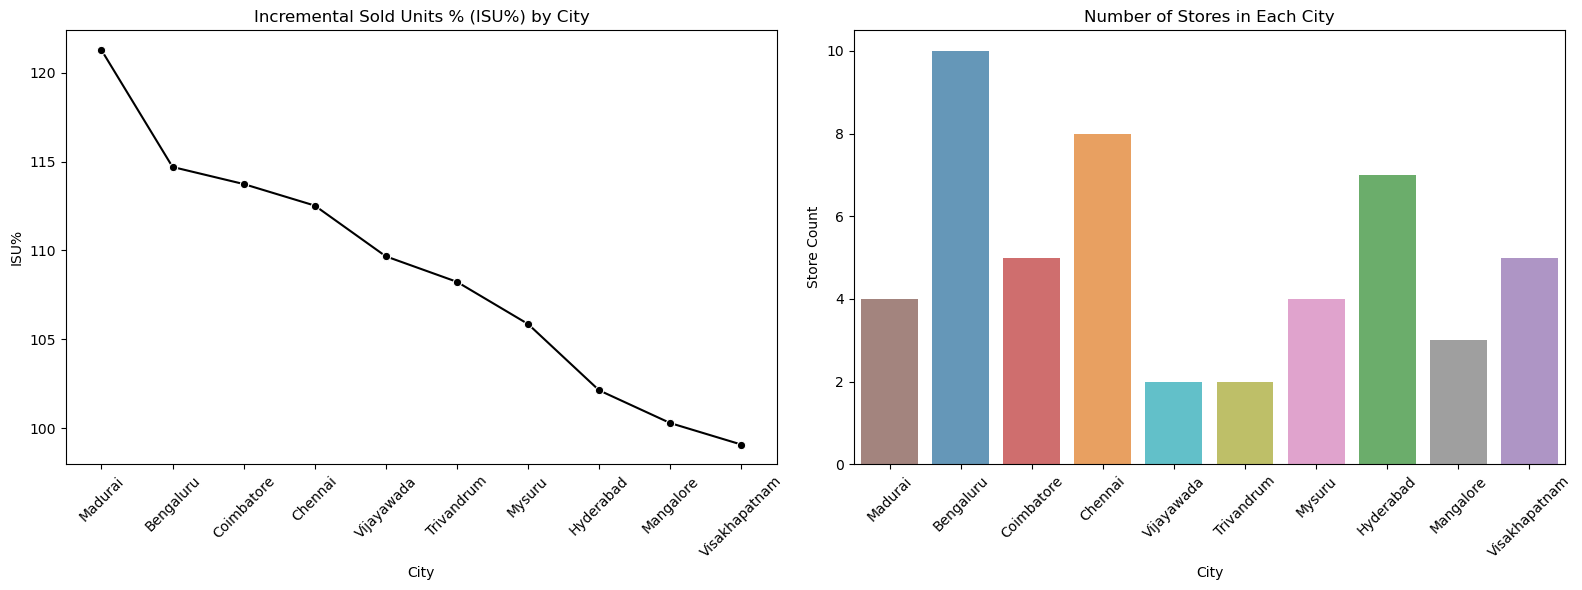

In [36]:
# Make sure both dataframes use the same city order (from ISU% plot)
city_order = city_sales['city'].tolist()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16,6), sharex=True)

# --- Plot 1: ISU% ---
sns.lineplot(
    data=city_sales, 
    x='city', y='ISU%', 
    marker='o', color='black', ax=axes[0]
)
axes[0].set_title("Incremental Sold Units % (ISU%) by City")
axes[0].set_ylabel("ISU%")
axes[0].set_xlabel("City")
axes[0].tick_params(axis='x', rotation=45)

# --- Plot 2: Store Count ---
sns.barplot(
    data=df_city, 
    x="City", y="Store_Count", 
    order=city_order,  hue= 'City',
    palette=colors, alpha=0.75, ax=axes[1]
)
axes[1].set_title("Number of Stores in Each City")
axes[1].set_ylabel("Store Count")
axes[1].set_xlabel("City")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('image6.png')

plt.show()
